# Regressão Logística I
Vamos aprofundar um pouco mais a nossa regressão.

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn import metrics
from scipy.stats import ks_2samp

In [91]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [92]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,flag_doente
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [94]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [95]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [96]:
df.query('ca == "?"')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0,0


In [97]:
df[df['thal']=="?"]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2,1


In [102]:
df.drop(df.query('thal == "?"').index, inplace = True)
df.drop(df[df['ca']=="?"].index, inplace = True)
df_cat['thal'] = df_cat['thal'].astype(float)
df_cat['ca'] = df_cat['ca'].astype(float)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          297 non-null    float64
 1   sex          297 non-null    object 
 2   cp           297 non-null    float64
 3   trestbps     297 non-null    float64
 4   chol         297 non-null    float64
 5   fbs          297 non-null    float64
 6   restecg      297 non-null    float64
 7   thalach      297 non-null    float64
 8   exang        297 non-null    float64
 9   oldpeak      297 non-null    float64
 10  slope        297 non-null    float64
 11  ca           297 non-null    float64
 12  thal         297 non-null    float64
 13  num          297 non-null    int64  
 14  flag_doente  297 non-null    object 
dtypes: float64(12), int64(1), object(2)
memory usage: 45.2+ KB


In [119]:
df_cat = df.copy()
df_cat['sex'].replace({0: 'feminino', 1: 'masculino'}, inplace=True)
df_cat['flag_doente'].replace({0: 'saudaveis', 1: 'diagnosticado'}, inplace=True)
df_cat['slope'].replace({1: 'inclinação ascendente', 2: 'estável', 3 : 'inclinação descendente'}, inplace=True)
df_cat['restecg'].replace({0: 'normal', 1: 'anormalidade da onda ST-T', 2 : 'hipertrofia'}, inplace=True)
df_cat['cp'].replace({1: 'angina típica', 2: 'angina atípica', 3 : 'dor não-angina',
                     4: 'assintomático'}, inplace=True)
df_cat['exang'].replace({0: 'não', 1: 'sim'}, inplace=True)

df_cat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,masculino,angina típica,145.0,233.0,1.0,hipertrofia,150.0,não,2.3,inclinação descendente,0.0,6.0,0,saudaveis
1,67.0,masculino,assintomático,160.0,286.0,0.0,hipertrofia,108.0,sim,1.5,estável,3.0,3.0,2,diagnosticado
2,67.0,masculino,assintomático,120.0,229.0,0.0,hipertrofia,129.0,sim,2.6,estável,2.0,7.0,1,diagnosticado
3,37.0,masculino,dor não-angina,130.0,250.0,0.0,normal,187.0,não,3.5,inclinação descendente,0.0,3.0,0,saudaveis
4,41.0,feminino,angina atípica,130.0,204.0,0.0,hipertrofia,172.0,não,1.4,inclinação ascendente,0.0,3.0,0,saudaveis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,feminino,assintomático,140.0,241.0,0.0,normal,123.0,sim,0.2,estável,0.0,7.0,1,diagnosticado
298,45.0,masculino,angina típica,110.0,264.0,0.0,normal,132.0,não,1.2,estável,0.0,7.0,1,diagnosticado
299,68.0,masculino,assintomático,144.0,193.0,1.0,normal,141.0,não,3.4,estável,2.0,7.0,2,diagnosticado
300,57.0,masculino,assintomático,130.0,131.0,0.0,normal,115.0,sim,1.2,estável,1.0,7.0,3,diagnosticado


1. Considere um script que monta a análise bivariada como uma função:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada para pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [118]:
def bivariada(df, resposta, explicativa):
    
    tab = pd.crosstab(df[explicativa], df[resposta], margins= True)
    tab['percentual_diagnosticado'] = tab['diagnosticado']/tab['All']
    tab['chance_diagnosticado'] = tab['diagnosticado']/tab['saudaveis']
    tab['RC'] = tab['chance_diagnosticado']/tab.loc['All','chance_diagnosticado']
    tab['log_RC'] = np.log(tab['RC'] )
    
    return tab
    
tab_sex = bivariada(df_cat, 'flag_doente', 'sex')
tab_sex

flag_doente,diagnosticado,saudaveis,All,percentual_diagnosticado,chance_diagnosticado,RC,log_RC
sex,,,,,,,
feminino,25,71,96,0.260417,0.352113,0.411226,-0.888611
masculino,112,89,201,0.557214,1.258427,1.469696,0.385055
All,137,160,297,0.461279,0.856250,1.000000,0.000000


In [120]:
tab_cp = bivariada(df_cat, 'flag_doente', 'cp')
tab_cp

flag_doente,diagnosticado,saudaveis,All,percentual_diagnosticado,chance_diagnosticado,RC,log_RC
cp,,,,,,,
angina atípica,9,40,49,0.183673,0.225000,0.262774,-1.336462
angina típica,7,16,23,0.304348,0.437500,0.510949,-0.671486
assintomático,103,39,142,0.725352,2.641026,3.084410,1.126360
dor não-angina,18,65,83,0.216867,0.276923,0.323414,-1.128823
All,137,160,297,0.461279,0.856250,1.000000,0.000000


In [121]:
tab_restecg = bivariada(df_cat, 'flag_doente', 'restecg')
tab_restecg

flag_doente,diagnosticado,saudaveis,All,percentual_diagnosticado,chance_diagnosticado,RC,log_RC
restecg,,,,,,,
anormalidade da onda ST-T,3,1,4,0.750000,3.000000,3.503650,1.253805
hipertrofia,79,67,146,0.541096,1.179104,1.377056,0.319948
normal,55,92,147,0.374150,0.597826,0.698191,-0.359263
All,137,160,297,0.461279,0.856250,1.000000,0.000000


In [122]:
tab_slope= bivariada(df_cat, 'flag_doente', 'slope')
tab_slope

flag_doente,diagnosticado,saudaveis,All,percentual_diagnosticado,chance_diagnosticado,RC,log_RC
slope,,,,,,,
estável,89,48,137,0.649635,1.854167,2.165450,0.772628
inclinação ascendente,36,103,139,0.258993,0.349515,0.408192,-0.896017
inclinação descendente,12,9,21,0.571429,1.333333,1.557178,0.442875
All,137,160,297,0.461279,0.856250,1.000000,0.000000


In [123]:
tab_exang = bivariada(df_cat, 'flag_doente', 'exang')
tab_exang

flag_doente,diagnosticado,saudaveis,All,percentual_diagnosticado,chance_diagnosticado,RC,log_RC
exang,,,,,,,
não,63,137,200,0.315000,0.459854,0.537056,-0.621653
sim,74,23,97,0.762887,3.217391,3.757537,1.323764
All,137,160,297,0.461279,0.856250,1.000000,0.000000


A variável exang é estatísticamente mais relevante. Ela possui valor 1 (sim) e apresenta maior percentual de doentes , maiores valores de Chance e Logito. Também podemos considerar relevante os casos com cp assintomático e restecg com anormalidade de onda (porém este tem um número muito pequeno na amostra)

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [128]:
def bivariada_quanti(df, resposta, explicativa):
    
    var = pd.qcut(x = df[explicativa], q = 5)
    tab = pd.crosstab(var, df[resposta], margins= True)
    tab['percentual_diagnosticado'] = tab['diagnosticado']/tab['All']
    tab['chance_diagnosticado'] = tab['diagnosticado']/tab['saudaveis']
    tab['RC'] = tab['chance_diagnosticado']/tab.loc['All','chance_diagnosticado']
    tab['log_RC'] = np.log(tab['RC'] )
    
    return tab

bivariada_quanti(df_cat, 'flag_doente', 'age')

flag_doente,diagnosticado,saudaveis,All,percentual_diagnosticado,chance_diagnosticado,RC,log_RC
age,,,,,,,
"(28.999, 45.0]",15,46,61,0.245902,0.326087,0.380831,-0.965398
"(45.0, 53.0]",21,40,61,0.344262,0.525000,0.613139,-0.489164
"(53.0, 58.0]",39,31,70,0.557143,1.258065,1.469272,0.384767
"(58.0, 62.8]",32,13,45,0.711111,2.461538,2.874789,1.055979
"(62.8, 77.0]",30,30,60,0.500000,1.000000,1.167883,0.155193
All,137,160,297,0.461279,0.856250,1.000000,0.000000


In [129]:
bivariada_quanti(df_cat, 'flag_doente', 'trestbps')

flag_doente,diagnosticado,saudaveis,All,percentual_diagnosticado,chance_diagnosticado,RC,log_RC
trestbps,,,,,,,
"(93.999, 118.4]",23,37,60,0.383333,0.621622,0.725981,-0.320231
"(118.4, 126.0]",29,32,61,0.475410,0.906250,1.058394,0.056753
"(126.0, 134.0]",25,34,59,0.423729,0.735294,0.858738,-0.152292
"(134.0, 145.0]",28,33,61,0.459016,0.848485,0.990931,-0.009110
"(145.0, 200.0]",32,24,56,0.571429,1.333333,1.557178,0.442875
All,137,160,297,0.461279,0.856250,1.000000,0.000000


In [130]:
bivariada_quanti(df_cat, 'flag_doente', 'chol')

flag_doente,diagnosticado,saudaveis,All,percentual_diagnosticado,chance_diagnosticado,RC,log_RC
chol,,,,,,,
"(125.999, 204.2]",24,36,60,0.400000,0.666667,0.778589,-0.250272
"(204.2, 231.0]",26,34,60,0.433333,0.764706,0.893087,-0.113071
"(231.0, 254.6]",23,35,58,0.396552,0.657143,0.767466,-0.264661
"(254.6, 287.6]",32,27,59,0.542373,1.185185,1.384158,0.325092
"(287.6, 564.0]",32,28,60,0.533333,1.142857,1.334724,0.288724
All,137,160,297,0.461279,0.856250,1.000000,0.000000


In [131]:
bivariada_quanti(df_cat, 'flag_doente', 'thalach')

flag_doente,diagnosticado,saudaveis,All,percentual_diagnosticado,chance_diagnosticado,RC,log_RC
thalach,,,,,,,
"(70.999, 130.0]",47,15,62,0.758065,3.133333,3.659367,1.297290
"(130.0, 146.4]",38,19,57,0.666667,2.000000,2.335766,0.848340
"(146.4, 159.0]",22,39,61,0.360656,0.564103,0.658806,-0.417326
"(159.0, 170.0]",21,40,61,0.344262,0.525000,0.613139,-0.489164
"(170.0, 202.0]",9,47,56,0.160714,0.191489,0.223637,-1.497730
All,137,160,297,0.461279,0.856250,1.000000,0.000000


A variável thalach é estatísticamente mais relevante para os valores menores que 130, apresenta maior percentual de doentes , maiores valores de Chance e Logito.

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [141]:
reglog = smf.logit("flag_doente ~ C(sex) + cp +  trestbps + age",data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.512416
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            4
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.2575
Time:                        17:57:21   Log-Likelihood:                -152.19
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 6.399e-22
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.9691      1.601     -6.851      0.000     -14.107      -7.831
C(sex)[T.1.0]     1.7944      0.331      5.414      0.000       1.145       2.444
cp                1.1100      0.168      6.594      0.000       0.780       1.440
trestbps          0.0214      0.008      2.606      0.009       0.005       0.038
age               0.0575      0.018      3.284      0.001       0.023       0.092
=================================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [142]:
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.208211
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.927271
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.844022
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.282500
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.026429


In [151]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
predito,
"(0.012799999999999999, 0.151]",60
"(0.151, 0.355]",59
"(0.355, 0.576]",59
"(0.576, 0.773]",59
"(0.773, 0.927]",60


In [152]:
qualid['media'] = group_reg['predito'].mean()
qualid

,contagem,media
predito,,
"(0.012799999999999999, 0.151]",60,0.078949
"(0.151, 0.355]",59,0.255356
"(0.355, 0.576]",59,0.461230
"(0.576, 0.773]",59,0.674197
"(0.773, 0.927]",60,0.836781


In [154]:
qualid['pct_sobrev'] = group_reg['flag_doente'].mean()
qualid

,contagem,media,pct_sobrev
predito,,,
"(0.012799999999999999, 0.151]",60,0.078949,0.100000
"(0.151, 0.355]",59,0.255356,0.203390
"(0.355, 0.576]",59,0.461230,0.491525
"(0.576, 0.773]",59,0.674197,0.677966
"(0.773, 0.927]",60,0.836781,0.833333


Text(0.5, 0, 'Grupo')

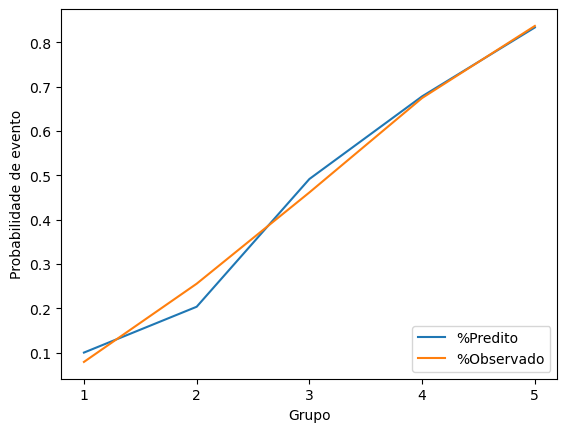

In [157]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_sobrev'].plot(label='%Predito')
ax = qualid['media'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

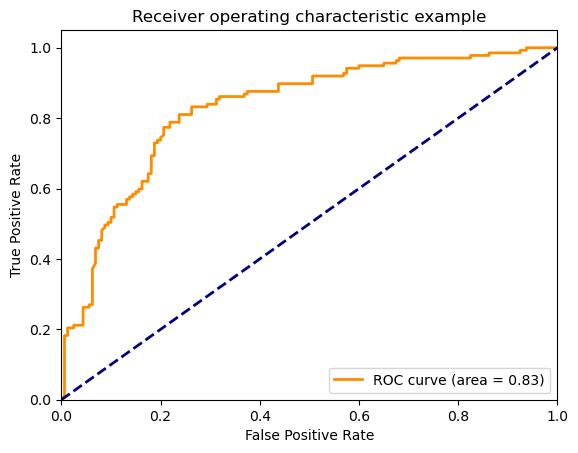

In [160]:
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Função Distribuição Acumulada')

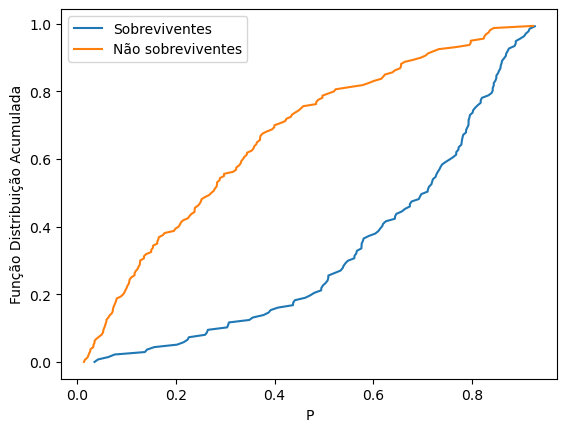

In [162]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Sobreviventes')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Não sobreviventes')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

In [164]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 78.11%
KS: 57.27% 
AUC: 82.88% 
GINI: 65.76%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [173]:
reglog_up = smf.logit("flag_doente ~ C(sex) + C(cp, Treatment(4)) +  trestbps + age",data=df).fit()
reglog_up.summary()

Optimization terminated successfully.
         Current function value: 0.480667
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.3035
Time:                        18:20:57   Log-Likelihood:                -142.76
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.910e-24
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -5.8702      1.411     -4.161      0.000      -8.635      -3.105
C(sex)[T.1.0]                  1.7989      0.352      5.112      0.000       1.109       2.489
C(cp, Treatment(4))[T.1.0]    -2.4547      0.553     -4.443      0.000      -3.538      -1.372
C(cp, Treatment(4))[T.2.0]    -2.4714      0.453     -5.452      0.000      -3.360      -1.583
C(cp, Treatment(4))[T.3.0]    -2.3415      0.362     -6.477      0.000      -3.050      -1.633
trestbps                       0.0192      0.009      2.255      0.024       0.003       0.036
age                            0.0568      0.018      3.110      0.002       0.021       0.093
==============================================================================================
"""

In [174]:
df['predito_up'] = reglog_up.predict(df)
acc = metrics.accuracy_score(df['flag_doente'], df['predito_up']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito_up'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito_up'], df.loc[df['flag_doente'] != 1, 'predito_up']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.12%
KS: 58.52% 
AUC: 84.87% 
GINI: 69.74%


In [175]:
reglog_up_2 = smf.logit(" flag_doente ~ C(sex) + C(cp, Treatment(4)) + trestbps + C(exang) + thalach + age"
                   , data=df).fit()

reglog_up_2.summary()

Optimization terminated successfully.
         Current function value: 0.441376
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                            8
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.3605
Time:                        18:21:10   Log-Likelihood:                -131.09
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 5.722e-28
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.9996      2.072     -0.482      0.630      -5.061       3.062
C(sex)[T.1.0]                  1.7519      0.367      4.774      0.000       1.033       2.471
C(cp, Treatment(4))[T.1.0]    -1.9734      0.577     -3.421      0.001      -3.104      -0.843
C(cp, Treatment(4))[T.2.0]    -1.8118      0.488     -3.715      0.000      -2.768      -0.856
C(cp, Treatment(4))[T.3.0]    -1.8560      0.385     -4.815      0.000      -2.612      -1.101
C(exang)[T.1.0]                0.8334      0.363      2.295      0.022       0.122       1.545
trestbps                       0.0226      0.009      2.458      0.014       0.005       0.041
thalach                       -0.0290      0.009     -3.342      0.001      -0.046      -0.012
age                            0.0304      0.020      1.513      0.130      -0.009       0.070
==============================================================================================
"""

In [176]:
df['predito_up_2'] = reglog_up_2.predict(df)
acc = metrics.accuracy_score(df['flag_doente'], df['predito_up_2']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito_up_2'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito_up_2'], df.loc[df['flag_doente'] != 1, 'predito_up_2']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.80%
KS: 60.08% 
AUC: 87.44% 
GINI: 74.87%


Categorizando a variável cp e incluindo as variáveis que notamos ser estatisticamente relevantes, tivemos um aumento de todos os critérios de avaliação adotados.